# <font color=aqua>**DETECCION DE COVID-19 MEDIANTE ALGORITMOS DE CLASIFICACIÓN MACHINE LEARNING**</font>
#### <font color=aqua>**AUTOR: NINA GUARDAPUCLLA CARLOS ALEX**</font>  

# <font color=green>**Lectura e información del dataset**</font>  

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("covid19.csv")
df

,Flag_sospechoso,tos,cefalea,congestion_nasal,dificultad_respiratoria,dolor_garganta,fiebre,diarrea,nauseas,anosmia_hiposmia,dolor_abdominal,dolor_articulaciones,dolor_muscular,dolor_pecho,otros_sintomas
0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1
2,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1
3,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0
4,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1001029,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1001030,1,1,0,1,0,1,0,0,0,0,0,0,0,0,0
1001031,1,1,0,0,0,1,1,0,0,0,0,0,0,0,0
1001032,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
df.columns

Index(['Flag_sospechoso', 'tos', 'cefalea', 'congestion_nasal',
       'dificultad_respiratoria', 'dolor_garganta', 'fiebre', 'diarrea',
       'nauseas', 'anosmia_hiposmia', 'dolor_abdominal',
       'dolor_articulaciones', 'dolor_muscular', 'dolor_pecho',
       'otros_sintomas'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001034 entries, 0 to 1001033
Data columns (total 15 columns):
 #   Column                   Non-Null Count    Dtype
---  ------                   --------------    -----
 0   Flag_sospechoso          1001034 non-null  int64
 1   tos                      1001034 non-null  int64
 2   cefalea                  1001034 non-null  int64
 3   congestion_nasal         1001034 non-null  int64
 4   dificultad_respiratoria  1001034 non-null  int64
 5   dolor_garganta           1001034 non-null  int64
 6   fiebre                   1001034 non-null  int64
 7   diarrea                  1001034 non-null  int64
 8   nauseas                  1001034 non-null  int64
 9   anosmia_hiposmia         1001034 non-null  int64
 10  dolor_abdominal          1001034 non-null  int64
 11  dolor_articulaciones     1001034 non-null  int64
 12  dolor_muscular           1001034 non-null  int64
 13  dolor_pecho              1001034 non-null  int64
 14  otros_sintomas    

In [ ]:
df.describe()

,Flag_sospechoso,tos,cefalea,congestion_nasal,dificultad_respiratoria,dolor_garganta,fiebre,diarrea,nauseas,anosmia_hiposmia,dolor_abdominal,dolor_articulaciones,dolor_muscular,dolor_pecho,otros_sintomas
count,1.001034e+06,1.001034e+06,1.001034e+06,1.001034e+06,1.001034e+06,1.001034e+06,1.001034e+06,1.001034e+06,1.001034e+06,1.001034e+06,1.001034e+06,1.001034e+06,1.001034e+06,1.001034e+06,1.001034e+06
mean,7.332688e-01,6.233205e-01,3.262187e-01,5.092025e-01,2.174921e-01,5.886304e-01,4.361250e-01,2.411307e-02,4.475372e-04,3.196695e-04,1.762677e-02,1.851685e-02,4.037925e-02,5.574236e-04,3.031366e-02
std,4.422509e-01,4.845537e-01,4.688286e-01,4.999156e-01,4.125403e-01,4.920822e-01,4.959035e-01,1.534003e-01,2.115035e-02,1.787645e-02,1.315906e-01,1.348110e-01,1.968472e-01,2.360325e-02,1.714490e-01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


# <font color=green>**Análisis exploratorio de los datos**</font>  

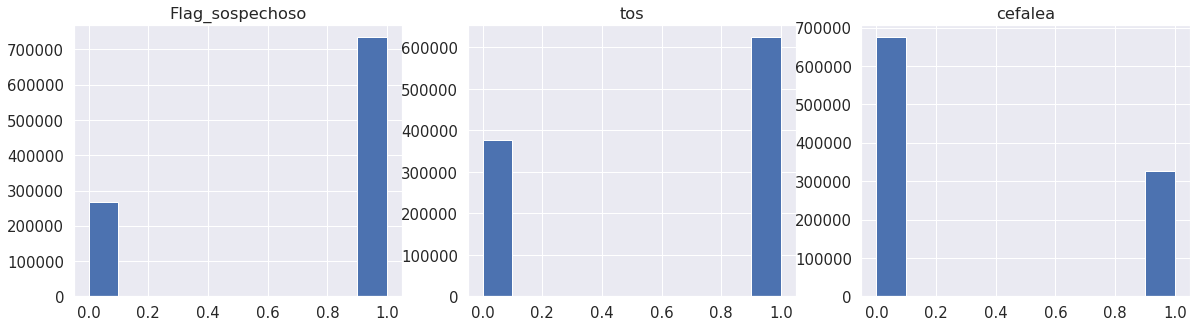

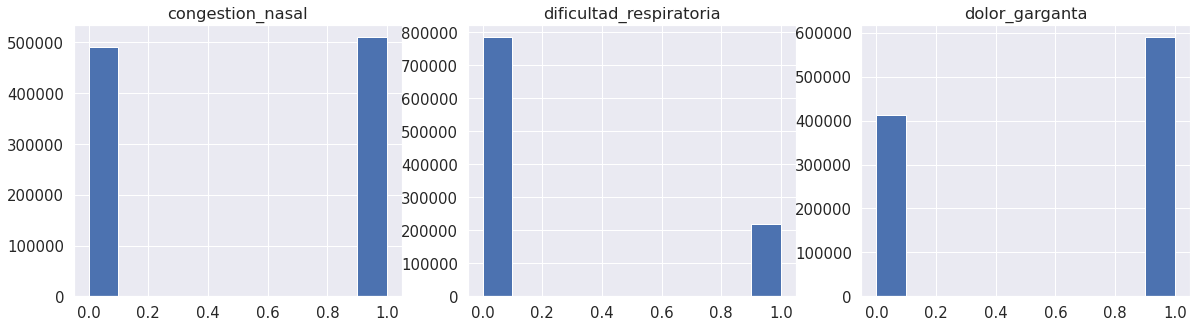

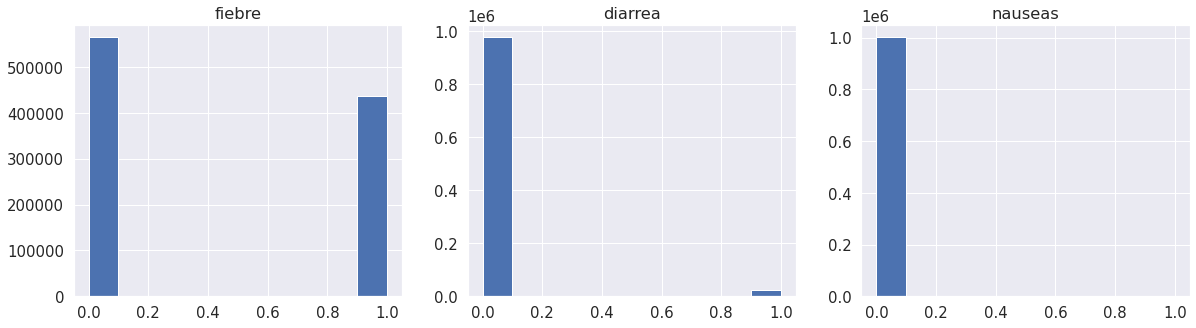

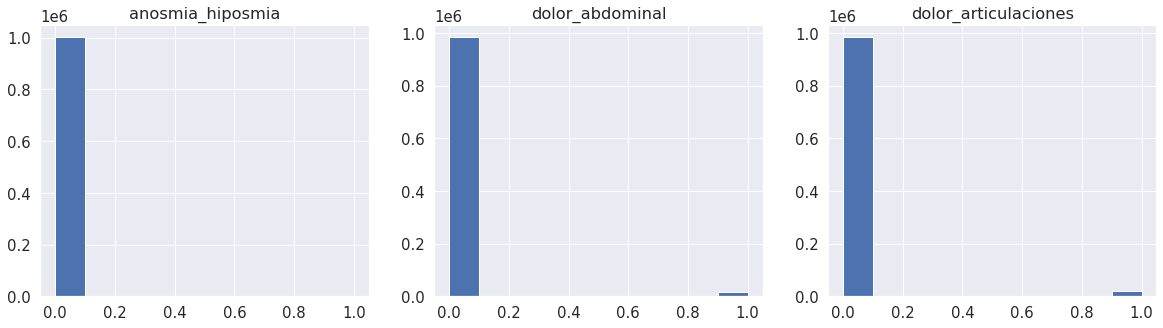

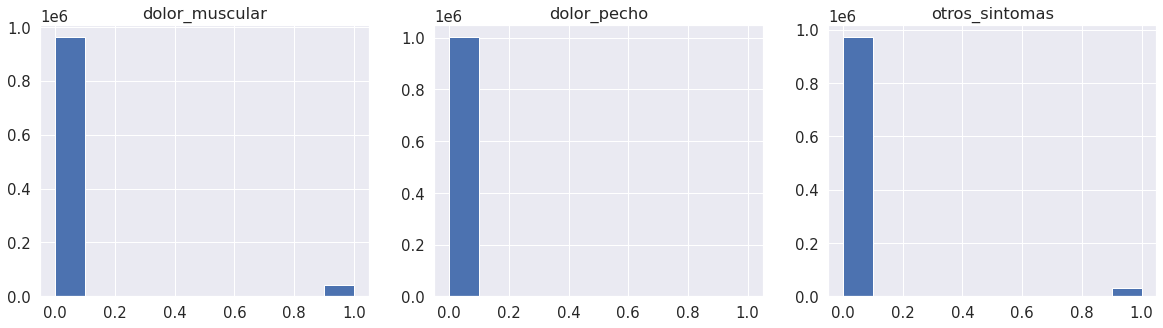

In [ ]:
# Cantidad de positivos y negativos por cada sintoma
names = df.columns.to_list()
i=0
while i < len(names):
  
  fig = plt.figure(figsize=(20,5)) # tamaño de la grafica

  ax1 = fig.add_subplot(1,3,1) # (NRO filas ,  nro de graficos o columnas, orden en que apareceran los graficos)
  ax2 = fig.add_subplot(1,3,2) # (nro de filas, nro de columnas, ubicaion del grafico)
  ax3 = fig.add_subplot(1,3,3)

  ax1.set_title(f"{names[i]}")
  ax1.hist(df[f"{names[i]}"])  # 1

  ax2.set_title(f"{names[i+1]}") # 2
  ax2.hist(df[f"{names[i+1]}"])

  ax3.set_title(f"{names[i+2]}") # 3
  ax3.hist(df[f"{names[i+2]}"])
  
  plt.show()
  i+=3

## analizando el porcentaje de personas con determinados sintomas para positivos o negativos a covid19

In [ ]:
# filtrar datos
df_positivo=df[df["Flag_sospechoso"]==1]
df_negativo=df[df["Flag_sospechoso"]==0]

positivo_tos=df_positivo[df_positivo["tos"]==1] # positivos y con tos
positivo_sin_tos=df_positivo[df_positivo["tos"]==0] # positivos y sin tos

negativo_tos=df_negativo[df_negativo["tos"]==1] # negativo y con tos
negativo_sin_tos=df_negativo[df_negativo["tos"]==0] # negativo y sin tos

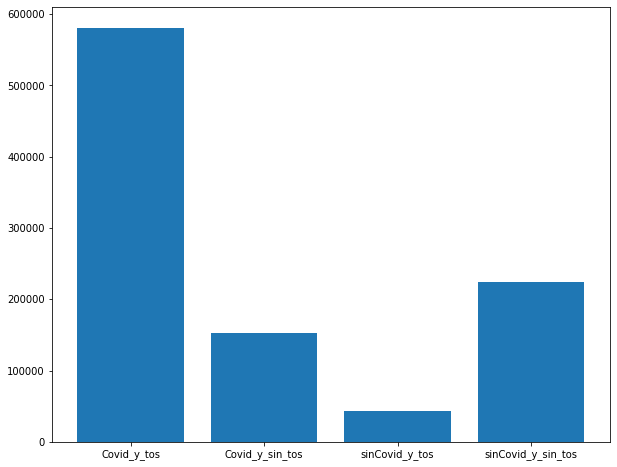

In [ ]:
values = np.array([positivo_tos["tos"].count(),positivo_sin_tos["tos"].count(),negativo_tos["tos"].count(),negativo_sin_tos["tos"].count()])
names = ["Covid_y_tos","Covid_y_sin_tos","sinCovid_y_tos","sinCovid_y_sin_tos"]

plt.figure(1, figsize=(10,8))
plt.bar(names,values)

# Show graphic
plt.show()

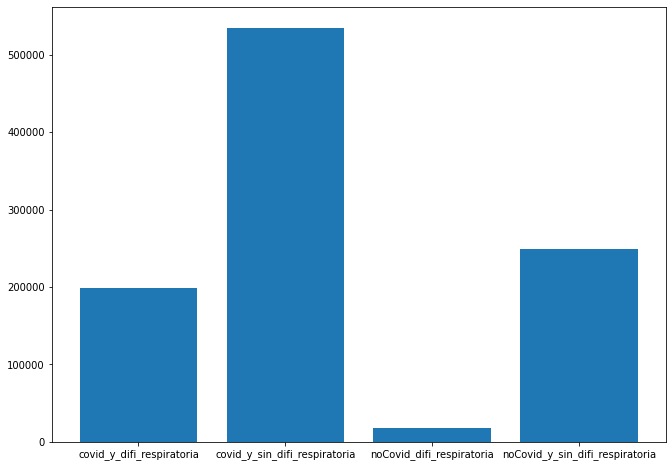

In [ ]:
# filtrar datos
df_positivo=df[df["Flag_sospechoso"]==1]
df_negativo=df[df["Flag_sospechoso"]==0]

positivo_dr=df_positivo[df_positivo["dificultad_respiratoria"]==1] # positivos y con tos
positivo_sin_dr=df_positivo[df_positivo["dificultad_respiratoria"]==0] # positivos y sin tos

negativo_dr=df_negativo[df_negativo["dificultad_respiratoria"]==1] # negativo y con tos
negativo_sin_dr=df_negativo[df_negativo["dificultad_respiratoria"]==0] # negativo y sin tos

values = np.array([positivo_dr["dificultad_respiratoria"].count(),positivo_sin_dr["dificultad_respiratoria"].count(),
                   negativo_dr["dificultad_respiratoria"].count(),negativo_sin_dr["dificultad_respiratoria"].count()])
names = ["covid_y_difi_respiratoria","covid_y_sin_difi_respiratoria",
         "noCovid_difi_respiratoria","noCovid_y_sin_difi_respiratoria"]

plt.figure(1, figsize=(11,8))
plt.bar(names,values)

# Show graphic
plt.show()

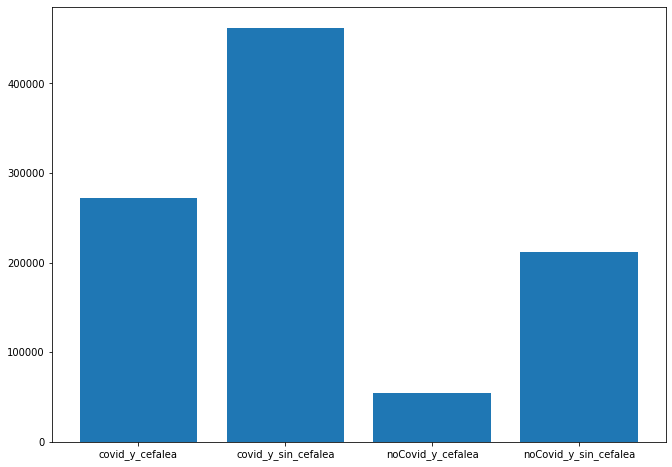

In [ ]:
# filtrar datos
df_positivo=df[df["Flag_sospechoso"]==1]
df_negativo=df[df["Flag_sospechoso"]==0]

positivo_dr=df_positivo[df_positivo["cefalea"]==1] # positivos y con tos
positivo_sin_dr=df_positivo[df_positivo["cefalea"]==0] # positivos y sin tos

negativo_dr=df_negativo[df_negativo["cefalea"]==1] # negativo y con tos
negativo_sin_dr=df_negativo[df_negativo["cefalea"]==0] # negativo y sin tos

values = np.array([positivo_dr["cefalea"].count(),positivo_sin_dr["cefalea"].count(),
                   negativo_dr["cefalea"].count(),negativo_sin_dr["cefalea"].count()])
names = ["covid_y_cefalea","covid_y_sin_cefalea",
         "noCovid_y_cefalea","noCovid_y_sin_cefalea"]

plt.figure(1, figsize=(11,8))
plt.bar(names,values)

# Show graphic
plt.show()

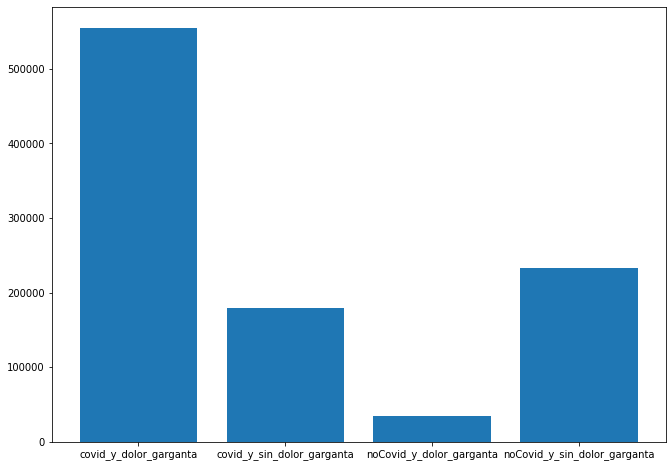

In [ ]:
# filtrar datos
df_positivo=df[df["Flag_sospechoso"]==1]
df_negativo=df[df["Flag_sospechoso"]==0]

positivo_dr=df_positivo[df_positivo["dolor_garganta"]==1] # positivos y con tos
positivo_sin_dr=df_positivo[df_positivo["dolor_garganta"]==0] # positivos y sin tos

negativo_dr=df_negativo[df_negativo["dolor_garganta"]==1] # negativo y con tos
negativo_sin_dr=df_negativo[df_negativo["dolor_garganta"]==0] # negativo y sin tos

values = np.array([positivo_dr["dolor_garganta"].count(),positivo_sin_dr["dolor_garganta"].count(),
                   negativo_dr["dolor_garganta"].count(),negativo_sin_dr["dolor_garganta"].count()])
names = ["covid_y_dolor_garganta","covid_y_sin_dolor_garganta",
         "noCovid_y_dolor_garganta","noCovid_y_sin_dolor_garganta"]

plt.figure(1, figsize=(11,8))
plt.bar(names,values)

# Show graphic
plt.show()

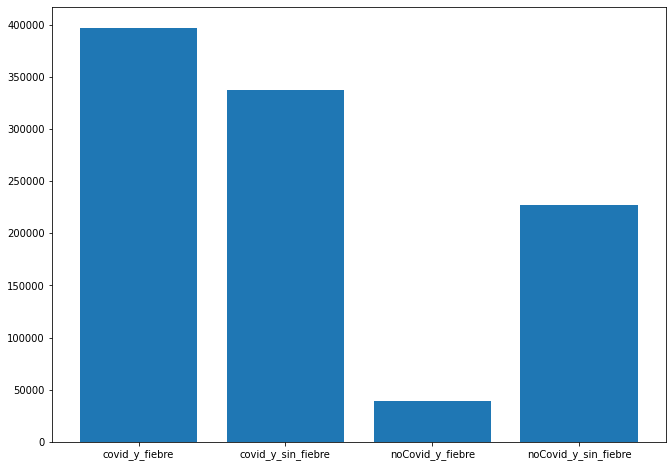

In [ ]:
# filtrar datos
df_positivo=df[df["Flag_sospechoso"]==1]
df_negativo=df[df["Flag_sospechoso"]==0]

positivo_dr=df_positivo[df_positivo["fiebre"]==1] # positivos y con tos
positivo_sin_dr=df_positivo[df_positivo["fiebre"]==0] # positivos y sin tos

negativo_dr=df_negativo[df_negativo["fiebre"]==1] # negativo y con tos
negativo_sin_dr=df_negativo[df_negativo["fiebre"]==0] # negativo y sin tos

values = np.array([positivo_dr["fiebre"].count(),positivo_sin_dr["fiebre"].count(),
                   negativo_dr["fiebre"].count(),negativo_sin_dr["fiebre"].count()])
names = ["covid_y_fiebre","covid_y_sin_fiebre",
         "noCovid_y_fiebre","noCovid_y_sin_fiebre"]

plt.figure(1, figsize=(11,8))
plt.bar(names,values)

# Show graphic
plt.show()

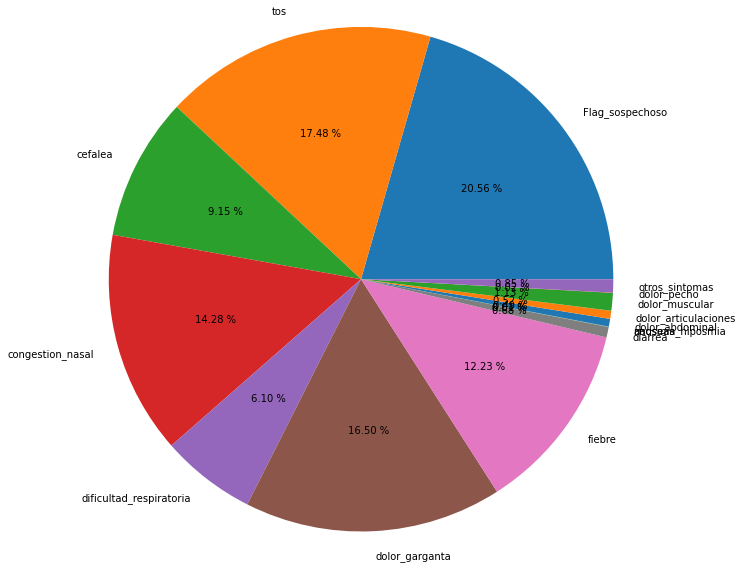

In [ ]:
# Porcentaje de personas que presentaron los diferentes sintomas
columnas = df.columns.to_list() # lista de sintomas
size_of_groups = df.sum().to_list() # obtener el total de personal con cada sintoma

porcentaje = []
total = len(df)
df.sum()
for val in size_of_groups:
  p = val*100/total
  porcentaje.append(p)

# Create a pie
plt.figure(1, figsize=(10,10))
#plt.pie(porcentaje,labels = columnas)
plt.pie(size_of_groups,labels = columnas, autopct="%0.2f %%")
plt.axis("equal")
plt.show()

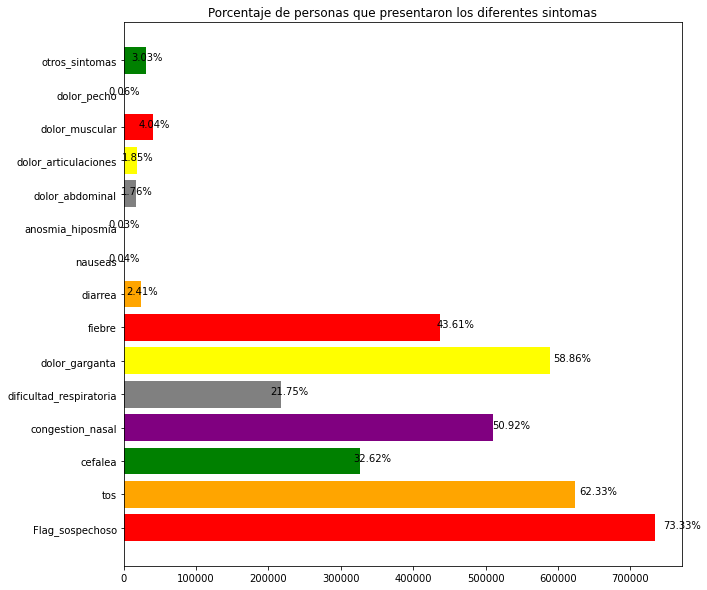

In [ ]:

columnas = df.columns.to_list() # lista de sintomas
size_of_groups = df.sum().to_list() # obtener el total de personal con cada sintoma
porcentaje = []

total = len(df)
df.sum()
for val in size_of_groups:
  p = round(val*100/total, ndigits=2)
  porcentaje.append(p)


# depict illustration
plt.figure(figsize=(10, 10))
colors_list = ['Red', 'Orange', 'green', 'Purple','Grey','Yellow']
graph = plt.barh(columnas, size_of_groups, color=colors_list)
plt.title('Porcentaje de personas que presentaron los diferentes sintomas')
 
i = 0
for p in graph:
    width = p.get_height()
    height = p.get_width()
    x, y = p.get_xy()
     
    plt.text(x+height*1.05,
             y+width/2, 
             str(porcentaje[i])+'%',
             ha='center')
    i += 1
plt.show()

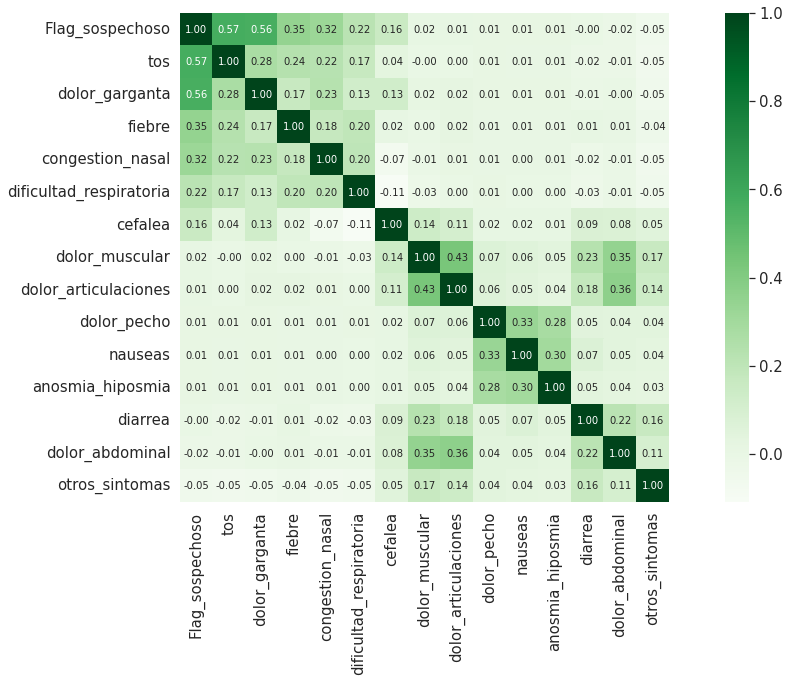

In [ ]:
# OBSERVAR EL GRADO DE CORRELACION ENTRE LAS VARIABLES
corr = df.corr()
plt.figure(figsize=(20, 9))
columnas = corr.nlargest(15 , 'Flag_sospechoso')['Flag_sospechoso'].index
cm = np.corrcoef(df[columnas].values.T)
sns.set(font_scale=1.35)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, 
                 yticklabels=columnas.values, xticklabels=columnas.values,cmap="Greens")
plt.show()

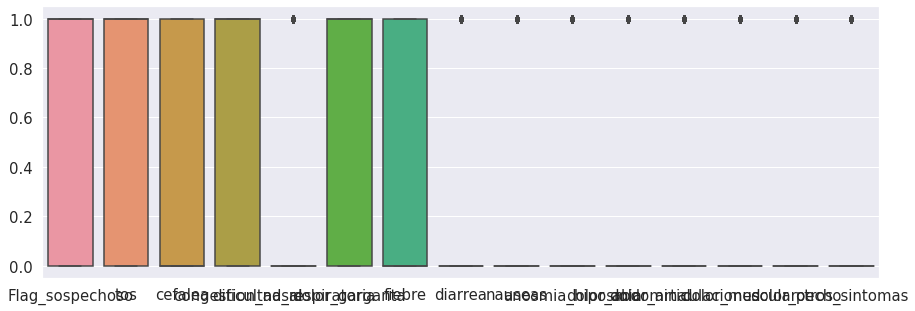

In [ ]:
# BUSQUEDA DE VALORES ATIPICOS (OUTLIERS) mediante gráficas
#boxplot general
plt.figure(figsize = [15, 5]) 
sns.boxplot(data = df);

# <font color=green>**Preprocesamiento de datos**</font> 

In [ ]:
# verificar si existe valores nulos
df.isnull().values.any()

False

In [ ]:
# revisar el target "Flag_sospechoso"
df['Flag_sospechoso'].unique()

array([0, 1])

In [ ]:
df['Flag_sospechoso'].value_counts()

1    734027
0    267007
Name: Flag_sospechoso, dtype: int64

# <font color=green>**MODELADO**</font> 

In [ ]:
from sklearn import tree                              # ARBOL DE DECISION
from sklearn.naive_bayes import GaussianNB            # NAIVE BAYES
from sklearn.linear_model import LogisticRegression   # REGRESION LOGISTICA
from sklearn.metrics import confusion_matrix          # metricas 
from sklearn.metrics import precision_score           # precisión
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

In [ ]:
# =========== SEPARACION DE DATOS =========== 
X = df.drop("Flag_sospechoso", axis=1)
Y = df["Flag_sospechoso"]

# separamos los datos en entrenamiento y prueba (este sirve para probar los algoritmos)
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size = 0.4, random_state=42)


In [ ]:
# seleccion de modelos
clasificador_dtree = tree.DecisionTreeClassifier(criterion="gini", max_depth = 100)
clasificador_gnb = GaussianNB()
clasificador_lr = LogisticRegression(solver="newton-cg")

In [ ]:
# crear un array que almacene las funciones
clasificadores = [
    ("dtree",clasificador_dtree),
    ("gnb",clasificador_gnb),
    ("lr",clasificador_lr)]

In [ ]:
values = []
scores = []
models_probabilities = []
# iterar las functiones
for nombre, clasificador in clasificadores:
  # entrenar
  clasificador.fit(X_train, y_train)
  
  # realizar prediccion(construir y_pred)
  y_pred = clasificador.predict(X_test)
  models_probabilities.append(y_pred)
  
  # evaluar las metricas de los modelos
  matriz = confusion_matrix(y_test, y_pred)
  values.append((nombre,matriz))
  print(f"{nombre} = Matriz de Confusión")
  print(matriz)
  #score
  precision = precision_score(y_test, y_pred)
  scores.append((nombre,precision))

dtree = Matriz de Confusión
[[ 92942  13449]
 [  4687 289336]]
gnb = Matriz de Confusión
[[ 94842  11549]
 [ 55488 238535]]
lr = Matriz de Confusión
[[ 92726  13665]
 [  8957 285066]]


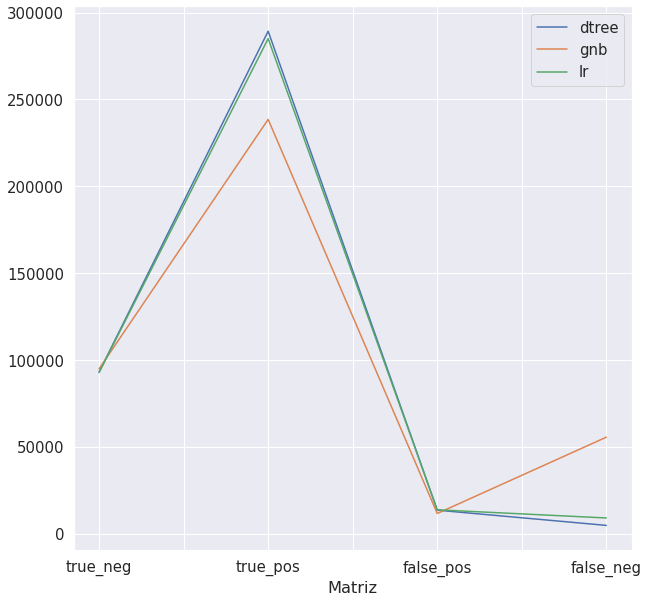

In [ ]:
columns = ["true_neg","true_pos","false_pos","false_neg"]
diccionario={"Matriz":columns}
# agregar elementos al dic
for nombre, matriz in values:
  values_pred = [matriz[0][0], matriz[1][1],matriz[0][1], matriz[1][0]]
  diccionario[f"{nombre}"]=values_pred

# graficar
df_values = pd.DataFrame(diccionario)
fig, ax = plt.subplots(1, figsize=(10,10))

df_values.plot(x = 'Matriz', y = 'dtree', ax = ax)
df_values.plot(x = 'Matriz', y = 'gnb', ax = ax)
df_values.plot(x = 'Matriz', y = 'lr', ax = ax)

plt.show()

# <font color=green>**METRICAS**</font> 

In [ ]:
print("\t PRECISION")
print("===========================")
for nombre, score in scores:
  print(f"{nombre} \t", score)

	 PRECISION
dtree 	 0.955582343907393
gnb 	 0.9538195166424082
lr 	 0.9542565050162186


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

# iterar las functiones
for nombre, clasificador in clasificadores:
  # entrenar
  clasificador.fit(X_train, y_train)
  # realizar prediccion(construir y_pred)
  y_pred = clasificador.predict(X_test)
  print(f"{nombre} = reporte de métricas")
  #score
  print(classification_report(y_test,y_pred ),"\n")



dtree = reporte de métricas
              precision    recall  f1-score   support

           0       0.95      0.87      0.91    106391
           1       0.96      0.98      0.97    294023

    accuracy                           0.95    400414
   macro avg       0.95      0.93      0.94    400414
weighted avg       0.95      0.95      0.95    400414
 

gnb = reporte de métricas
              precision    recall  f1-score   support

           0       0.63      0.89      0.74    106391
           1       0.95      0.81      0.88    294023

    accuracy                           0.83    400414
   macro avg       0.79      0.85      0.81    400414
weighted avg       0.87      0.83      0.84    400414
 

lr = reporte de métricas
              precision    recall  f1-score   support

           0       0.91      0.87      0.89    106391
           1       0.95      0.97      0.96    294023

    accuracy                           0.94    400414
   macro avg       0.93      0.92      0.93  

In [ ]:
# Curva de ROC
from sklearn.metrics import roc_curve, roc_auc_score

models_probs = []
models_fpr_tpr = []
for y_pred in models_probabilities:
  # Calculando auc score
  auc = roc_auc_score(y_test, y_pred)
  models_probs.append(auc)
  # Calculando la curva de ROC -> fpr,tpr
  model_fpr, model_tpr, _ = roc_curve(y_test, y_pred)
  models_fpr_tpr.append((model_fpr, model_tpr))

In [ ]:
r_probs = [0 for _ in range(len(y_test))] # probabilidad de referencia base
models_probs.append(roc_auc_score(y_test, r_probs))
model_fpr_, model_tpr_, _ = roc_curve(y_test, r_probs)
models_fpr_tpr.append((model_fpr_, model_tpr_))

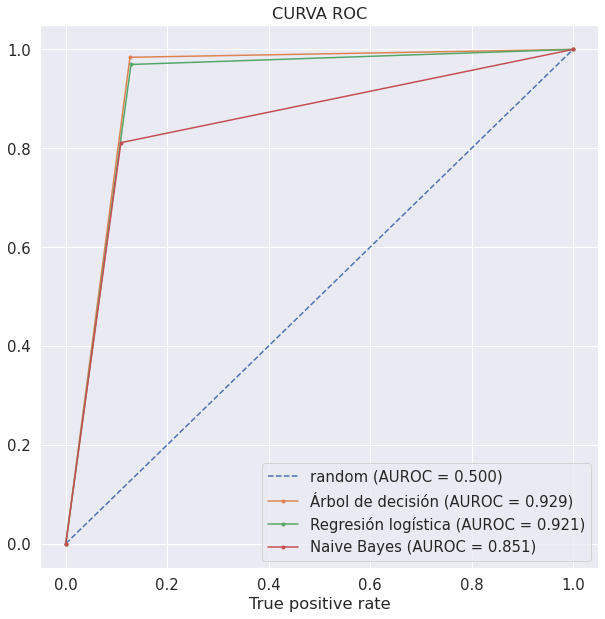

In [ ]:
# graficando CURVA ROC

auc_dtree = models_probs[0]
auc_gnb = models_probs[1]
auc_lr = models_probs[2]
auc_r = models_probs[3]


dtree_fpr, dtree_tpr = models_fpr_tpr[0]
gnb_fpr, gnb_tpr = models_fpr_tpr[1]
lr_fpr, lr_tpr = models_fpr_tpr[2]
r_fpr, r_tpr = models_fpr_tpr[3]

plt.figure(figsize=(10,10))

plt.plot(r_fpr, r_tpr,linestyle='--', label="random (AUROC = %0.3f)" % auc_r)
plt.plot(dtree_fpr, dtree_tpr,marker='.', label="Árbol de decisión (AUROC = %0.3f)" % auc_dtree)
plt.plot(lr_fpr, lr_tpr,marker='.', label="Regresión logística (AUROC = %0.3f)" % auc_lr)
plt.plot(gnb_fpr, gnb_tpr,marker='.', label="Naive Bayes (AUROC = %0.3f)" % auc_gnb)

plt.title("CURVA ROC")
plt.xlabel("False positive rate")
plt.xlabel("True positive rate")

plt.legend()
plt.show()